In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv
/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv


#  **Data Import**

In [44]:
test_data="/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_test.csv"
train_data="/kaggle/input/predicting-pulsar-starintermediate/pulsar_data_train.csv"

df_test = pd.read_csv(test_data)
df_train = pd.read_csv(train_data)

df=pd.concat([df_train,df_test],ignore_index=True)

In [45]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [46]:
df_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


# Exploratory Data Analysis (EDA)

In [47]:
# view dimensions of dataset
df.shape

(17898, 9)

In [48]:
df_train.shape

(12528, 9)

In [49]:
# view the column names of the dataframe
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [50]:
# remove leading spaces from column names
df.columns=df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [51]:
# rename column names

df.columns=['Mean','SD','Kurtosis','Skewness','DM_SNR_Mean','DM_SMR_SD','DM-SNR Kurtosis','DM-SNR Skewness','Target_class']
df.columns

Index(['Mean', 'SD', 'Kurtosis', 'Skewness', 'DM_SNR_Mean', 'DM_SMR_SD',
       'DM-SNR Kurtosis', 'DM-SNR Skewness', 'Target_class'],
      dtype='object')

In [52]:
df.head()

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [53]:
df['Target_class'].value_counts()

Target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [54]:
class_proportions = df['Target_class'].value_counts() / int(len(df))

print(class_proportions)

Target_class
0.0    0.635546
1.0    0.064421
Name: count, dtype: float64


In [55]:
#view summary of Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean             17898 non-null  float64
 1   SD               17898 non-null  float64
 2   Kurtosis         15396 non-null  float64
 3   Skewness         17898 non-null  float64
 4   DM_SNR_Mean      17898 non-null  float64
 5   DM_SMR_SD        16196 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17029 non-null  float64
 8   Target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [56]:
des=df.describe()
des

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [57]:
#check duplicated in dataset
df.duplicated().sum()

0

In [58]:
#check for misssing values in varriables
df.isnull().sum() 

Mean                  0
SD                    0
Kurtosis           2502
Skewness              0
DM_SNR_Mean           0
DM_SMR_SD          1702
DM-SNR Kurtosis       0
DM-SNR Skewness     869
Target_class       5370
dtype: int64

In [59]:
# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Display the missing percentage
print(missing_percentage)

Mean                0.000000
SD                  0.000000
Kurtosis           13.979216
Skewness            0.000000
DM_SNR_Mean         0.000000
DM_SMR_SD           9.509442
DM-SNR Kurtosis     0.000000
DM-SNR Skewness     4.855291
Target_class       30.003352
dtype: float64


 the percentage of missing data is less than 5%. In DM-SNR Skewness so we can dropping values in this column
 

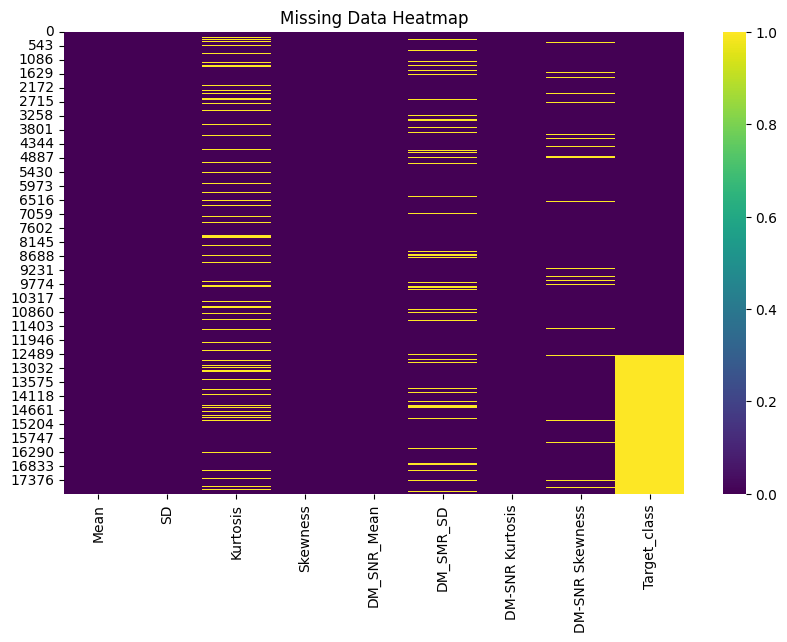

In [60]:
# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

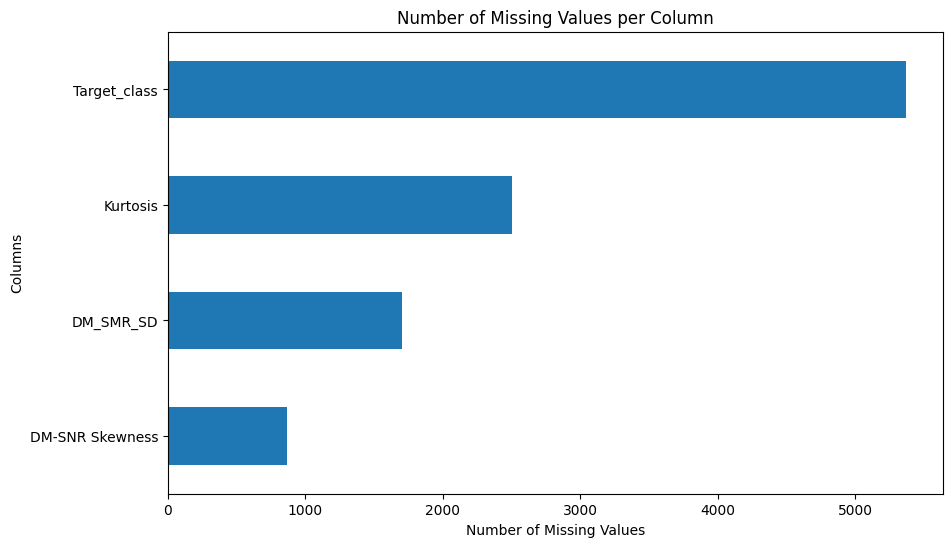

In [61]:
# Calculate the number of missing values per column
missing_values = df.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values as a bar chart
missing_values.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Number of Missing Values per Column")
plt.xlabel("Number of Missing Values")
plt.ylabel("Columns")
plt.show()

****

****

# handling missing values 

In [62]:
# Drop rows where DM-SNR_Skewness is missing and modify the DataFrame in place
df.dropna(subset=['DM-SNR Skewness'], inplace=True)

# Verify that the missing values in the DM-SNR_Skewness column have been dropped
print(df.isnull().sum())



Mean                  0
SD                    0
Kurtosis           2362
Skewness              0
DM_SNR_Mean           0
DM_SMR_SD          1612
DM-SNR Kurtosis       0
DM-SNR Skewness       0
Target_class       5126
dtype: int64


In [63]:
skewness = df['DM_SMR_SD'].skew()
print(skewness)


1.8916798294765353


The data is skewed (Positive skewness),so using the median might be more appropriate than mean to handling misssing values 

In [64]:
df['DM_SMR_SD'] = df['DM_SMR_SD'].fillna(df['DM_SMR_SD'].mean())


In [65]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now you can proceed with your operations
#(np.inf) and (-np.inf) represent positive and negative infinity, respectively.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


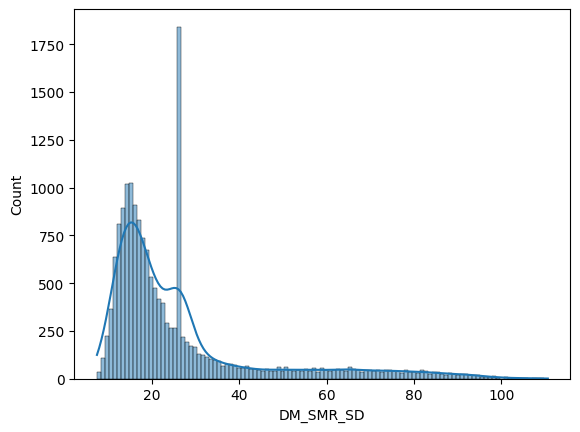

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['DM_SMR_SD'], kde=True)
plt.show()


In [67]:
#check Skewness before transformation 
print('before transformation:',df['DM_SMR_SD'].skew())

#Aplly Logarithmic Transformation
df['DM_SMR_SD']=np.log(df['DM_SMR_SD']+1)

#check Skewness after Transformation
print ('after transformation:',df['DM_SMR_SD'].skew())


before transformation: 1.9881002006020314
after transformation: 0.9334754239933494


In [68]:
#handling missing values in Kurtosis columns using KNN
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df[["Kurtosis"]]=imputer.fit_transform(df[['Kurtosis']])

In [69]:
#handling missing values in Target_class column using drop rows
df.dropna(subset=['Target_class'], inplace=True)


In [70]:
print(df.isnull().sum())


Mean               0
SD                 0
Kurtosis           0
Skewness           0
DM_SNR_Mean        0
DM_SMR_SD          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
Target_class       0
dtype: int64


In [71]:
#view summary statistics  in numerical variables 
round(des,2)

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
count,17898.00,17898.00,15396.00,17898.00,17898.00,16196.00,17898.00,17029.00,12528.00
mean,111.08,46.55,0.48,1.77,12.61,26.37,8.30,104.73,0.09
std,25.65,6.84,1.07,6.17,29.47,19.54,4.51,106.61,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.78,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,82.77,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.44,10.70,139.16,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


# Visualize Outliers in Dataset 

Text(0, 0.5, 'DM-SNR Skewness')

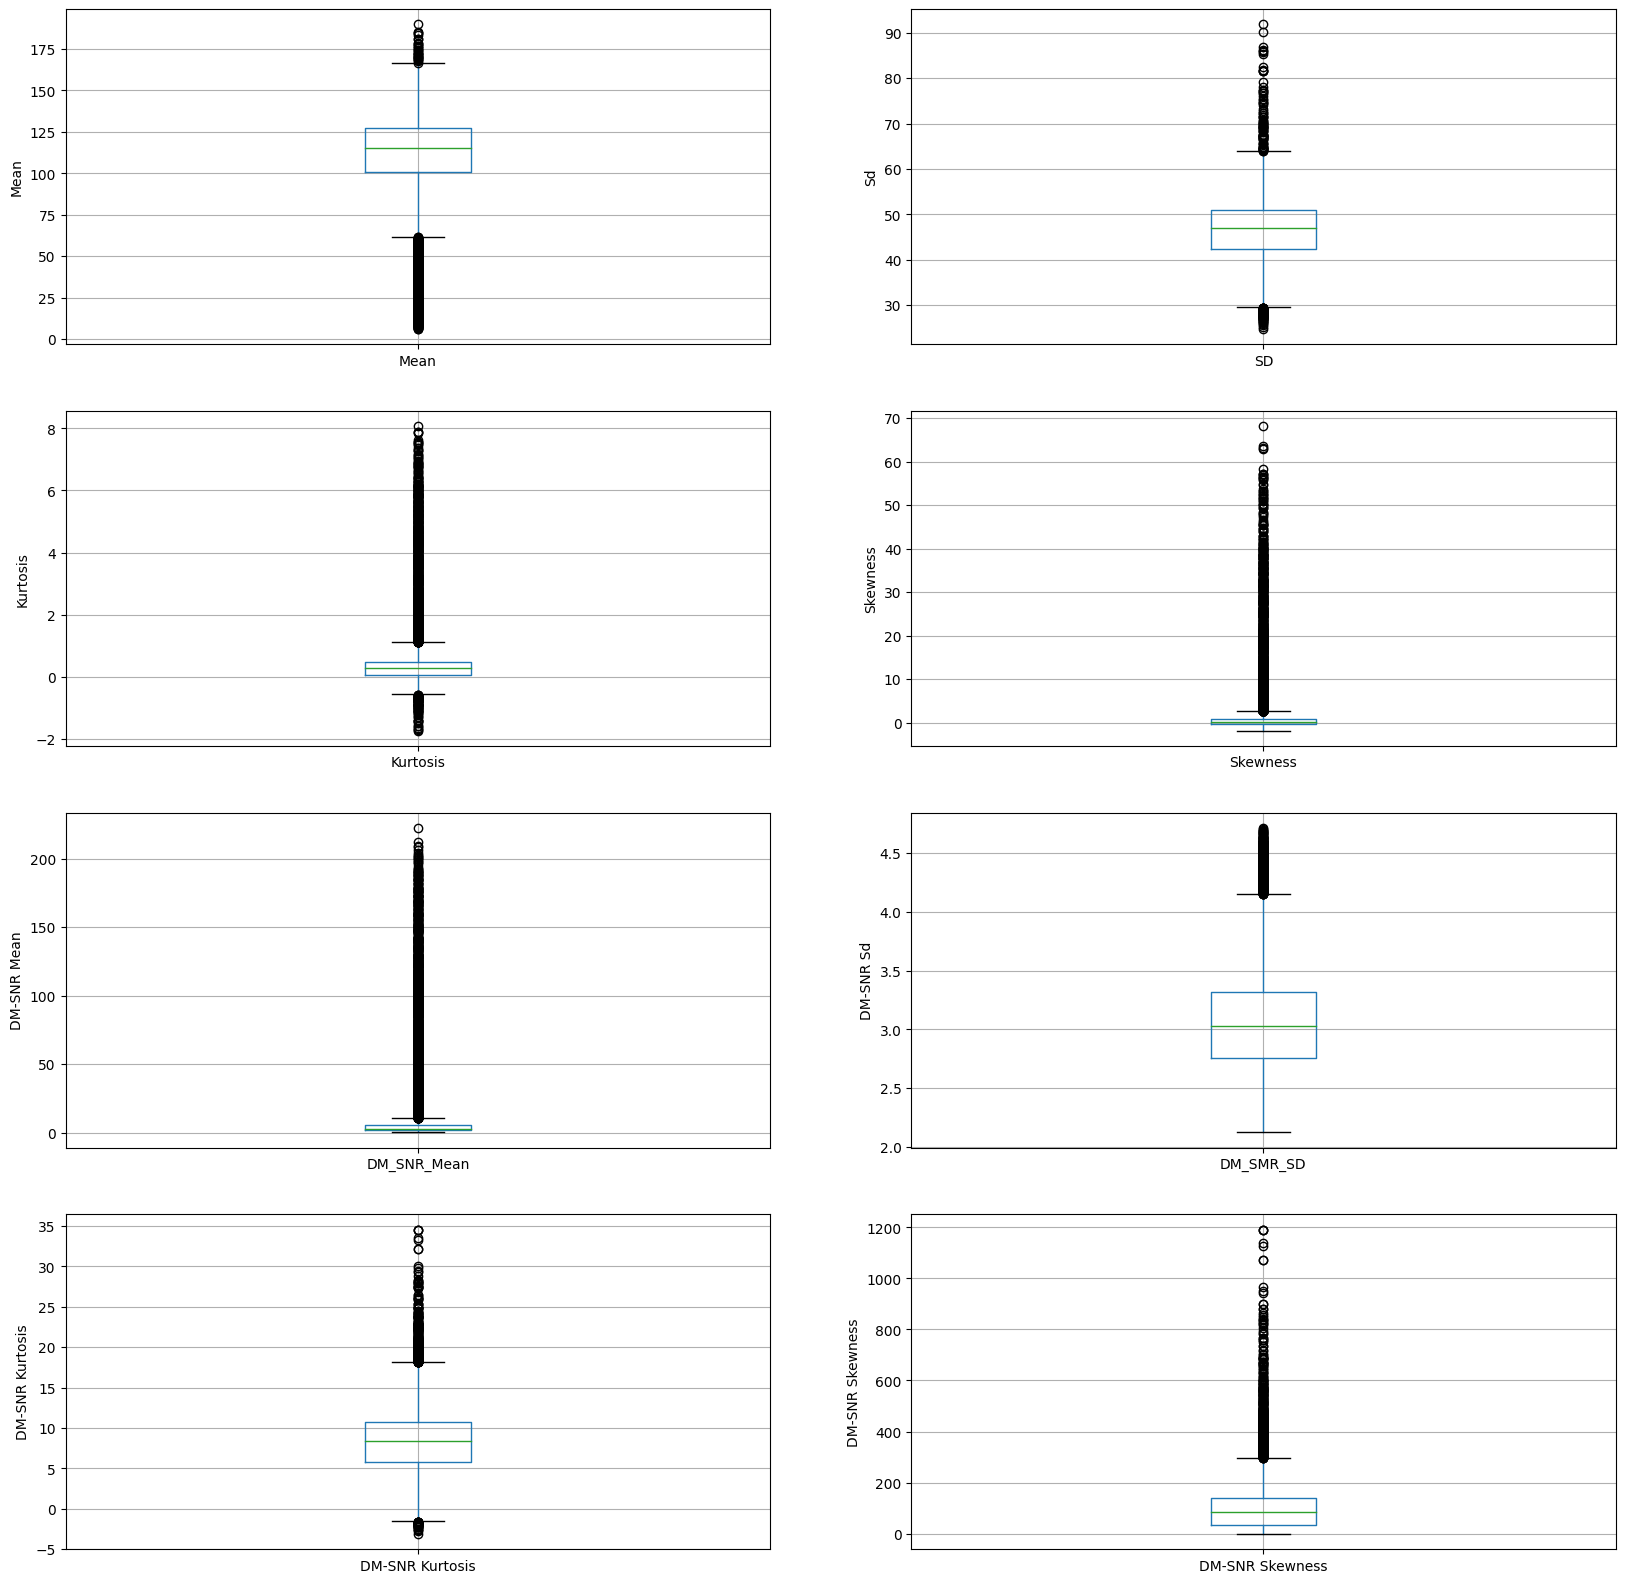

In [72]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='Mean')
fig.set_title('')
fig.set_ylabel('Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='SD')
fig.set_title('')
fig.set_ylabel('Sd')



plt.subplot(4,2,3)
fig=df.boxplot(column='Kurtosis')
fig.set_title("")
fig.set_ylabel('Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='Skewness')
fig.set_title('')
fig.set_ylabel('Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM_SNR_Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM_SMR_SD')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')


Text(0, 0.5, 'Number of pulsar stars')

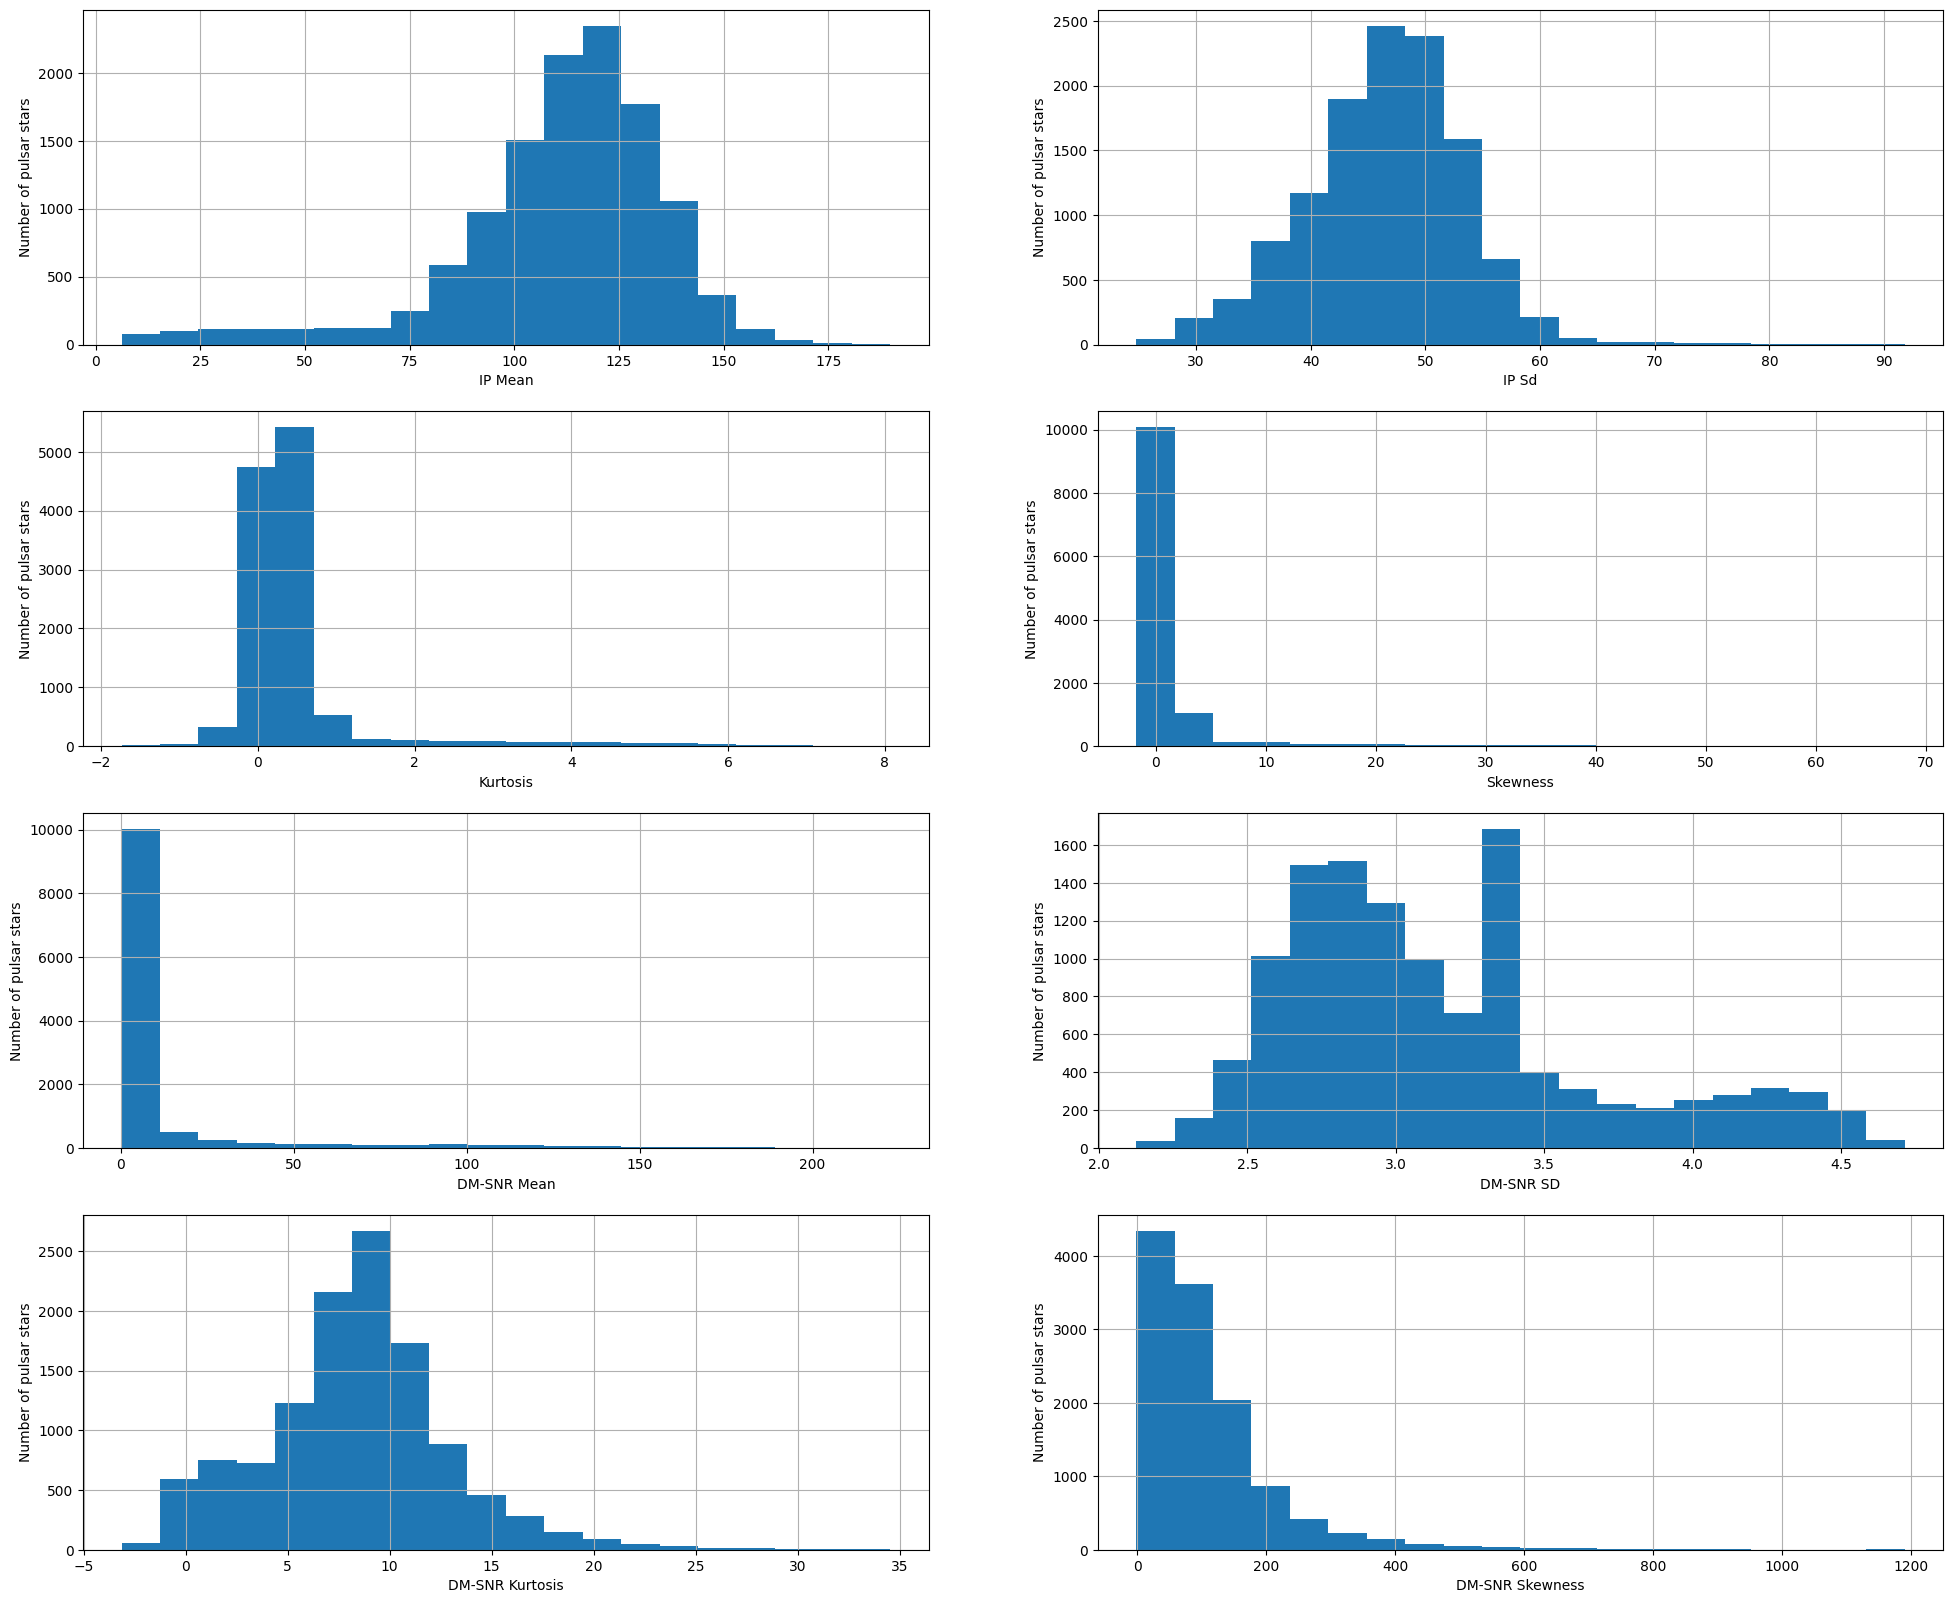

In [73]:
# plot histogram to check distribution


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['SD'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['Kurtosis'].hist(bins=20)
fig.set_xlabel('Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['Skewness'].hist(bins=20)
fig.set_xlabel('Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM_SNR_Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM_SMR_SD'].hist(bins=20)
fig.set_xlabel('DM-SNR SD')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

# Handling Outlier Using SVM

# Declare feature vector and target variable 


In [74]:
x=df.drop(['Target_class'],axis=1)
y = df['Target_class']

# Split Dataset


In [75]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
# check the shape of X_train and X_test

x_train.shape, x_test.shape

((9522, 8), (2381, 8))

# Feature scaling

** using standardscaler**

In [77]:
from sklearn.preprocessing import StandardScaler
cols=x_train.columns
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [78]:
#we made this step cuz after StanderdScaler step dataset convert from DATAFRAME into Array so we need back to Dataframe
x_train = pd.DataFrame(x_train, columns=[cols])

In [79]:
x_test = pd.DataFrame(x_test, columns=[cols])

In [80]:
round(x_train.describe(),4)

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness
count,9522.0000,9522.0000,9522.0000,9522.0000,9522.0000,9522.0000,9522.0000,9522.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-4.1178,-3.2353,-2.2494,-0.5746,-0.4230,-1.9339,-2.4404,-0.9895
25%,-0.3981,-0.6087,-0.4222,-0.3140,-0.3656,-0.7399,-0.5623,-0.6519
50%,0.1615,0.0585,-0.1890,-0.2509,-0.3353,-0.2194,0.0247,-0.2082
75%,0.6232,0.6647,0.0068,-0.1355,-0.2452,0.3238,0.5250,0.3147
max,3.0667,6.4822,7.7422,10.7974,6.6357,2.9521,5.7512,9.9782


# Run SVM 

In [81]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

#instantiate  classifier with default hyperparameter 
svc=SVC()
 
#fit classifierr to training set 
svc.fit(x_train ,y_train)

#make predictions on test set
y_pred=svc.predict(x_test)


#print accuracy 
print('model accuracy : {}'.format(accuracy_score(y_test,y_pred))) 


model accuracy : 0.9739605207895842


# **Visualization SVM**

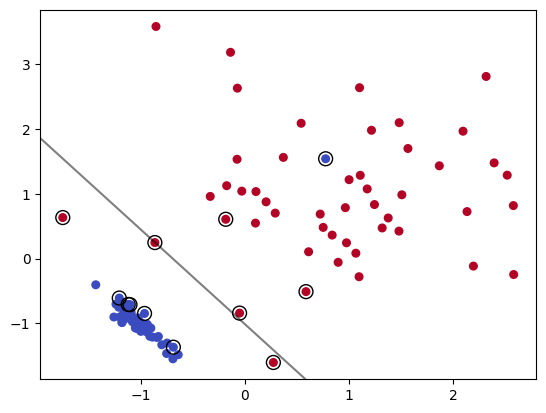

In [86]:
# Load a dataset
from sklearn import datasets
x, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    n_clusters_per_class=1, n_samples=100, random_state=6)

# Fit the SVM model
clf = SVC(kernel='linear', C=1.0)
clf.fit(x, y)

# Plot the data points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=30)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision boundary
ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

# Support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


In [87]:
#instantiate  classifier with Linear kernal and C=1.0
# Support Vector Classification=SVC
clf = SVC(kernel='linear', C=1.0)


#fit classifier to training set
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [88]:
# Predictions
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.98
Test Accuracy: 0.97


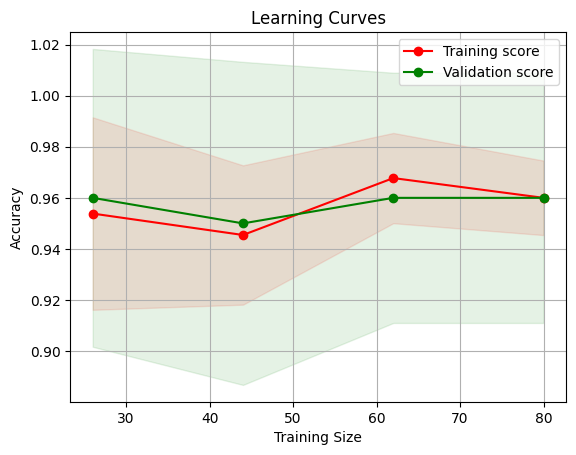

In [89]:
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    clf, x, y, cv=5, scoring='accuracy', n_jobs=-1
)

# Mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Mean and standard deviation of validation scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid()
plt.show()


# Confusion Matrix


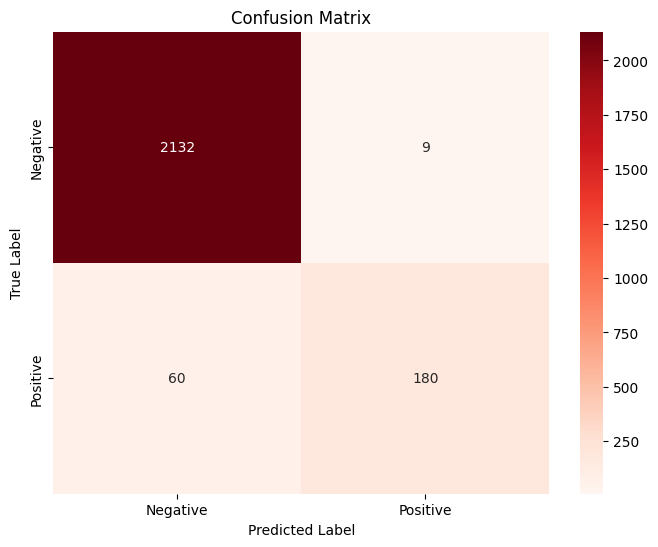

In [106]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels y_test and predicted labels y_test_pred
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Metrix

* Classification report is another way to evaluate the classification model performance

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2141
         1.0       0.95      0.75      0.84       240

    accuracy                           0.97      2381
   macro avg       0.96      0.87      0.91      2381
weighted avg       0.97      0.97      0.97      2381



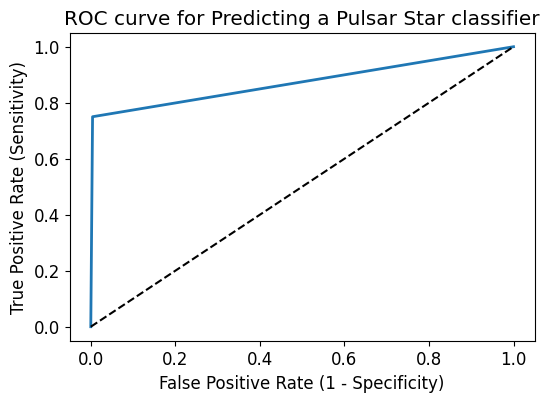

In [112]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1],'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()